# 2. k-means Clustering with Semidefinite Programming - 45 points

Clustering is and unsupervised machine learning problem in which we try to partition a given dataset into $k$ subsets based on distance between data points or similarity among them. The goal is to find $k$ centers and to assign each data point to one of the centers such that the sum of the square distances between them are minimal [1]. This problem is known to be NP-hard. 

## Clustering problem
Given a set of $n$ points in a $d-$dimensional Euclidean space, denoted by
\begin{equation*}
S = \{ \mathbf{s}_i = (s_{i1}, \cdots, s_{id})^\top~\in \mathbb{R}^d ~~ i = 1, \cdots, n\}
\end{equation*}
find an assignment of the $n$ points into $k$ disjoint clusters $\mathcal{S} = (S_1, \cdots, S_k)$ whose centers are $\mathbf{c}_j(j = 1, \cdots, k)$ based on the total sum of squared Euclidean distances from each point $\mathbf{s}_i$ to its assigned cluster centroid $\mathbf{c}_i$, i.e.,
\begin{equation}
f(S,\mathcal{S}) = \sum_{j=1}^k\sum_{i=1}^{|S_j|}\|\mathbf{s}_i^{j} - \mathbf{c}_j \|^2,
\label{eq:cluster}\tag{Clustering Problem}
\end{equation}
where $|S_j|$ is the number of points in $S_j$, and $\mathbf{s}_i^{j} $ is the $i^{th}$ point in $S_j$.

## Lloyd's algorithm for k-means



  **1.** Choose initial cluster centers $\mathbf{c}_1, \mathbf{c}_2, \cdots , \mathbf{c}_k$
  
  **2.** Repeat until convergence:
  $$\begin{cases}
  \text{Assignment step: }~~  \mathbf{s}_i ~~\text{belongs to cluster } j\text{, where} j := \text{argmin}_{j \in [1,k]} \|\mathbf{s}_i-\mathbf{c}_j\|   \\
  \text{Update each cluster center: }~~~~~~~~ \mathbf{c}_j = \frac 1{|S_j|} \sum_{i=1}^{|S_j|} \mathbf{s}_i^{j} \\
  \end{cases}$$


Note that the algorithm converges to local optimal points, so
\eqref{eq:cluster} can be arbitrarily bad depending on the
initialization of the cluster centers.


 **SDP relaxation of the problem:** The work (Peng & Wei, 2007)
proposes an SDP-relaxation to approximately solve the aforementioned
model-free $k-$means clustering problem. The resulting optimization
problem (See section (2) of (Peng & Wei, 2007) for details of this
    relaxation and Lecture 14 for a brief introduction.) takes the standard semidefinite programming form

$$\mathbf{X}^\star \in \arg \min_{ \mathbf{X} } \bigg\{ \langle \boldsymbol{C}, \mathbf{X} \rangle : ~\underbrace{\mathbf{X} \mathbf{1} =  \mathbf{1}}_{A_1(\mathbf{X}) = b_1},\underbrace{~\mathbf{X}^{\top} \mathbf{1} = \mathbf{1}}_{A_2(\mathbf{X}) = b_2},~\underbrace{\mathbf{X} \geq 0}_{B(\mathbf{X}) \in \mathcal{K}},~\underbrace{\mathrm{Tr}(\mathbf{X}) \leq \kappa, ~\mathbf{X} \in \mathbb{R}^{p\times p} ,~\mathbf{X}\succeq 0 }_{\mathcal{X}} \bigg\},
\label{prob1}\tag{Problem 1}$$ 
where $C \in \mathbb{R}^{p \times p}$ is the
Euclidean distance matrix between the data points.
$\mathrm{Tr}(\mathbf{X}) \leq \kappa$ enforces approximately low-rank
solutions, the linear inclusion constraint $\mathbf{X} \geq 0$ is element-wise
nonnegativity of ${\mathbf{X}}$, the linear equality constraints
$\mathbf{X}\mathbf{1} = \mathbf{1}$ and $\mathbf{X}^{\top} \mathbf{1} = \mathbf{1}$
require row and column sums of $\mathbf{X}$ to be equal to 1's, and
$\mathbf{X} \succeq 0$ means that $\mathbf{X}$ is positive semi-definite. Recall that
$\mathrm{Tr}(\mathbf{X}) = \|\mathbf{X}\|_\ast$ for any positive semi-definite matrix
$\mathbf{X}$.

The SDP in Problem 1 can be reformulated as 
$$
\min_{\mathbf{X} \in \mathcal{X}}~~~ f(\mathbf{X}) + g_1(A_1(\mathbf{X})) + g_2(A_2(\mathbf{X})) \qquad\text{subject to}\qquad B(\mathbf{X}) \in \mathcal{K}, \label{prob2}\tag{Equation 2}$$ 
where $f(\mathbf{X}) = \langle  \boldsymbol{C}, \mathbf{X} \rangle$ is a
smooth convex function, $g_1=\delta_{\{b_1\}}(\cdot)$ is the indicator
function of singleton $\{b_1\}$, $g_2=\delta_{\{b_2\}}(\cdot)$ is the
indicator function of singleton $\{b_2\}$ and ${\mathcal{K}}$ is the
positive orthant for which computing the projection is easy.

## 2.1 Theory - 25 points

#### Question 2.1.1 (2 pts) 
Would Frank-Wolfe be a valid approach to solve this problem? Elaborate on your answer. 

<font color=‘blue’>
    
**Write your answer here**

The Frank-Wolfe algorithm is applicable to smooth objective functions. However, in this case, the objective function is non-smooth due to $g_1$ and $g_2$, which are indicator functions, thus violating the requirement.

In the sequel, we will attempt to solve this problem with the HomotopyCGM method (**Algorithm 1**) proposed in
(Yurtsever et al., 2018) to handle the non-smooth problems with a
conditional gradient based method.
Another option for solving this problem is PD3O
method (**Algorithm 2**).

#### Question 2.1.2 (3 pts) Characterizing the domain

Show that the domain $\mathcal{X} = \{\mathbf{X}: \mathrm{Tr}(\mathbf{X}) \leq \kappa,~\mathbf{X} \in \mathbb{R}^{p\times p} ,~\mathbf{X} \succeq 0\}$ is a convex set. For this purpose, apply the definition of set convexity.


<font color=‘blue’>
    
**Write your answer here**

$\forall \mathbf{X}, \mathbf{Y} \in \mathcal{X}, \forall \lambda \in [0,1]$, let $\mathbf{Z} = \lambda \mathbf{X} + (1 - \lambda) \mathbf{Y}$. We need to check whether Z belongs to $\mathcal{X}$ or not. 

**1st Constraint:**

As $\mathbf{X} \in \mathcal{X}: \mathrm{Tr}(\mathbf{X}) = \|\mathbf{X}\|_\ast \le \kappa$.

As $\mathbf{Y} \in \mathcal{X}: \mathrm{Tr}(\mathbf{Y}) = \|\mathbf{Y}\|_\ast \le \kappa$. 

As $\mathbf{Z}$ is a positive sum of two psd matrices, $Z \succeq 0$. 

Moreover: $$\mathrm{Tr}(\mathbf{Z}) = \|\mathbf{Z}\|_\ast = \|\mathbf{\lambda \mathbf{X} + (1 - \lambda) \mathbf{Y}}\|_\ast \le \lambda \|\mathbf{X}\|_\ast + (1- \lambda) \|\mathbf{Y}\|_\ast \le \lambda \kappa + (1 - \lambda)\kappa = \kappa $$

**2nd Constraint:**

The linear combination of two matrices $\mathbf{X}, \mathbf{Y} \in \mathbb{R}^{p \times p}$ results in a matrix $\mathbf{Z} \in \mathbb{R}^{p \times p}$.

**3rd Constraint:**

If X and Y are SDP , we are going to show that Z is SDP too. Recall the definition of a SDP matrix : if A is SDP then $(v^TAv \geq{0}) \forall v$. We want to verify that Z is SDP, thus : 

$$ v^TZv \geq{0} = v^T (\lambda X + (1-\lambda) Y) v = \lambda v^TXv + (1-\lambda) v^TYv $$

And by hypothesis of X and Y belong to $\mathcal{X}$, we obtain : $\lambda ~\underbrace{(v^TXv)}_{\geq 0} + (1-\lambda) ~\underbrace{(v^TYv)}_{\geq 0} \geq{0}$. Z is thus SDP.


The 3 constraints are satisfied for $\mathbf{Z}$. Thus, we can conclude that $\mathbf{Z} \in \mathcal{X}$ and the domain $\mathcal{X}$ is convex.










#### Question 2.1.3  (8 pts) Gradient of the penalized objective

Given a linear inclusion constraint $Tx \in \mathcal{Y}$,
the corresponding quadratic penalty function is given by
$$\text{QP}_\mathcal{Y}(x) = \text{dist}^2(Tx, \mathcal{Y}) = \min_{y \in \mathcal{Y}} \| y-Tx\|^2.$$
Write down the constraints in (Equation 2) in
the quadratic penalty form. 

Write down the penalized objective based on the formulation in Lecture 13 with penalty parameter $\beta$.



<font color=‘blue’>
    
**Write your answer here**

Constraints in the quadratic penalty form : 

Knowing that the two first constraints are ${\mathbf{X1} = \mathbf{1}}$ and ${\mathbf{X^T1} = \mathbf{1}}$, the penalty will be based on the distance between the two side of the equal. Therefore, the two constraints will be written : 

$p_1 = \| \mathbf{X1} - \mathbf{1} \|^2$

$p_2 = \| \mathbf{X^T1} - \mathbf{1} \|^2$

The third one, we just use the definition for linear inclusion constraint :

$p_3 = \min_{y \in \mathcal{Y }, y\geq 0} \| y-X\|^2 = \|(\min(X,0))\|^2$ (by using Danskin's theorem,check the question 2.1.4)


Penalized objective based on the formulation in Lecture 13 is just the constraints under the quadratic penalty form summed with a coefficient :

$f^*(x) =\langle  \boldsymbol{C}, \mathbf{X} \rangle  + \frac{\beta_1}{2} * \| \mathbf{X1} - \mathbf{1} \|^2 + \frac{\beta_2}{2} * \| \mathbf{X^T1} - \mathbf{1} \|^2 + \frac{\beta_3}{2} * \min_{y \in \mathcal{Y},y\geq 0} \| y-X\|^2$

#### Question 2.1.4 (7 pts) 

Derive the gradient of the penalized objective explicitly  by deriving the gradient and projection specific to (Equation 2) -->. 
(Hint: You can write
$\text{dist}^2(Tx, \mathcal{Y}) = \| y^\ast - Tx \|^2$, where
$y^\ast = \arg \min _{y\in \mathcal{Y}} \| y - Tx \|^2$. and take
the derivative with respect to $\mathbf{X}$ without worrying about
$y^\ast$ depending on $\mathbf{X}$, thanks to Danskin's theorem.

<font color=‘blue’>
    
**Write your answer here**

For the three first term, we can easily derive the gradient : 

$$ \nabla \langle  \boldsymbol{C}, \mathbf{X} \rangle = C$$
$$  \nabla \left( \frac{\beta_1}{2} \| \mathbf{X1} - \mathbf{1} \|^2 \right) = \nabla \left( \frac{\beta_1}{2} \langle \mathbf{X1} - \mathbf{1}, \mathbf{X1} - \mathbf{1} \rangle \right) = \beta_1 (\mathbf{X}\mathbf{1} - \mathbf{1}) \mathbf{1}^\top
$$

Using the same reasoning than the second term, we obtain : 

$$  \nabla \left( \frac{\beta_2}{2} \| \mathbf{X^T1} - \mathbf{1} \|^2 \right) = \nabla \left( \frac{\beta_2}{2} \langle \mathbf{X^T1} - \mathbf{1}, \mathbf{X^T1} - \mathbf{1} \rangle \right) = \beta_2 (\mathbf{X^T1} - \mathbf{1}) \mathbf{1}^\top
$$

Finally, for the linear inclusion constraint, we will use the hint and thus Danskin's theorem:

$$ \nabla \left(\frac{\beta_3}{2} \min_{y \in \mathcal{Y },y\geq 0} \| y-X\|^2\right) = \nabla \frac{\beta_3}{2}\| y^\ast - X \|^2$$

We can now only derive regarding X : 

$$ \nabla \left(\frac{\beta_3}{2}\| y^\ast - X \|^2\right) = \beta_3 (X-y^\ast) \Longrightarrow  y^\ast = X $$

And taking in account the constraint, we can compute: 

$$ y^\ast = \min_{y \in \mathcal{Y },y\geq 0} {\| y - X \|^2} = \max(X,0) $$

The gradient of the last constraint is : 

$$ \nabla \left(\frac{\beta_3}{2} \min_{y \in \mathcal{Y },y\geq 0} {\| y - X \|^2} \right)= \beta_3 (X-y^\ast) = \beta_3 (X-\max(X,0)) = \beta_3 (\min(X,0)) $$ 


To put it in a nutshell the gradient of the penalized function is : 

$$ \nabla f^*(x) = C + \beta_1 (\mathbf{X}\mathbf{1} - \mathbf{1}) \mathbf{1}^\top + \beta_2 (\mathbf{X^T1} - \mathbf{1}) \mathbf{1}^\top + \beta_3 (\min(X,0))$$


#### Question 2.1.5 (5 pts) 

The algorithm PD3O (Yan, Ming, 2018) can be used to solve the problem
$$ \begin{equation} \min_x f(x) + g(A(x)) + h(x) \end{equation}$$ where,
$f(x) = \langle \boldsymbol{C}, x \rangle$ and
$h(x) = \delta_{\mathcal{X}}(x)$. Moreover,
$g(A(x)) = g_1(A_1 (x)) + g_2(A_2 (x)) + \delta_{\mathcal{K}}(Bx)$ for a
suitably defined $g$ and $A$.
#### PD3O splitting method
  ------------------------------------------------------------------------------------------------------------------------------
  **1.** Choose $x^0 \in\mathcal{X}, y^0\in\mathbb{R}^{2p+p^2}$ and $\tau, \sigma >  0$
  
  **2.** For $k=1, 2, \ldots$ perform:
  $$\begin{cases}
  x^{k+1} &= \mathrm{prox}_{\tau h}(x^k - \tau (\nabla f(x^k) + A^\top y^k)) \\
  \tilde x^{k+1} &= 2x^{k+1} - x^k +  \tau \nabla f(x^k)-  \tau \nabla f(x^{k+1})\\
  y^{k+1} &= \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1}))
  \end{cases}$$ 
  
  **3.Output: $~x^k$**
  
  ---------------------------------------------------------------------------------------------------------------------------------


In particular, define
$$\begin{aligned} 
z  = \begin{bmatrix} z_1 \\ z_2 \\ z_3 \end{bmatrix} = \begin{bmatrix}A_1x \\ A_2 x \\ Bx \end{bmatrix},~~~~~A = \begin{bmatrix} A_1 \\ A_2 \\ B \end{bmatrix}~~~~\Rightarrow~~~~~z= A(x),
\end{aligned}\tag{Definition of A}$$
and
$$\tag{Definition of g}
g(z) = \delta_{\{b_1\}}(z_1) + \delta_{\{b_2\}}(z_2) + \delta_\mathcal{K}(z_3).$$

Using the definitions we used for $g$ and $A$
in (Definition of A)
and (Definition of g), show that the $y^{k+1}$ update step of
PD3O can be written in the form
$$y^{k+1} := \begin{bmatrix} y_1^{k+1} \\ y_2^{k+1} \\ y_3^{k+1} \end{bmatrix} = \begin{bmatrix} y_1^k \\ y_2^k \\ y_3^k \end{bmatrix} +\sigma \begin{bmatrix} A_1\tilde x^{k+1} - b_1 \\ A_2\tilde x^{k+1} - b_2 \\ B\tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + B\tilde x^{k+1}) \end{bmatrix},$$
and
$$A^\top y^{k+1} = A^\top y^k + \sigma (A_1^\top(A_1 (\tilde x^{k+1}) - b_1) + A_2^\top (A_2 (\tilde x^{k+1}) - b_2) +B^\top(B\tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y^k_3 + B\tilde x^{k+1}))),$$
where the vector $y$ in the dual domain can be written in the form
$y = [y_1~,~y_2~,~y_3]^\top$ with $y_1, y_2\in\mathbb{R}^p$ and
$y_3 \in\mathbb{R}^{p^2}$ (see
also (Definition of A)).

**Hint**: Use Moreau's decomposition to write the update using
$\mathrm{prox}_{g}$ instead of $\mathrm{prox}_{g^\ast}$. In
particular
$$y^{k+1} = \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1})) = y^k + \sigma A( \tilde x^{k+1}) - \sigma \mathrm{prox}_{\sigma^{-1} g}(\sigma^{-1}y^k + A(\tilde x^{k+1})) \\
%&= y^k + \sigma (A_1\tilde x^{k+1} + A_2\tilde x^{k+1} + \tilde x^{k+1}) - \sigma (b_1+b_2+\mathrm{proj}_\mathcal{K}(\sigma^{-1}y^k + \tilde x^{k+1}))$$
The remaining steps are to
use (Definition of A) and find how to compute
$\mathrm{prox}_{g}$ when $g$ is in the decomposed form given
in (Definition of g).

<font color=‘blue’>
    
**Write your answer here**


Knowing that we have : 

$$y^{k+1} := \begin{bmatrix} y_1^{k+1} \\ y_2^{k+1} \\ y_3^{k+1} \end{bmatrix} = \begin{bmatrix} y_1^k \\ y_2^k \\ y_3^k \end{bmatrix} +\sigma \begin{bmatrix} A_1\tilde x^{k+1} - b_1 \\ A_2\tilde x^{k+1} - b_2 \\ B\tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + B\tilde x^{k+1}) \end{bmatrix},$$

And that by Moreau's identity we have : 

$$y^{k+1} = \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1})) = y^k + \sigma A( \tilde x^{k+1}) - \sigma \mathrm{prox}_{\sigma^{-1} g}(\sigma^{-1}y^k + A(\tilde x^{k+1})) \\
%&= y^k + \sigma (A_1\tilde x^{k+1} + A_2\tilde x^{k+1} + \tilde x^{k+1}) - \sigma (b_1+b_2+\mathrm{proj}_\mathcal{K}(\sigma^{-1}y^k + \tilde x^{k+1}))$$

We can just proceed by identification to find $\mathrm{prox}_{g}$ (the proximal operator of g) : 

$$ \mathrm{prox}_{\sigma^{-1} g}(\sigma^{-1}y^k + A(\tilde x^{k+1})) = \begin{bmatrix}  b_1 \\ b_2 \\ \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + B\tilde x^{k+1}) \end{bmatrix},$$

## 2.2 Practice - 20 points

In [1]:
from lib.part2.helpers import *
from lib.part2.Llyod_kmeans import *

### Define operators
We provide 2 operators and their conjugates:
1. `A1`: Linear operator that takes the row sums
2. `At2`: Conjugate of operator A1
3. `A2`: Linear operator that takes the column sums 
4. `At2`: Conjugate of operator A2

### Algorithm 1. Homotopy CGM

You will first implement Homotopy CGM which is defined below for the problem specified in (Equation 2).

  #### Homotopy Conditional Gradient Method (HCGM)
  ---------------------------------------------------------------------------------------------------------------------------------
  **1.** Choose $x^0 \in\mathcal{X}$ and $\beta_0 >  0$
  
  **2.** For $k=1, 2, \ldots$ perform:
  $$
  \begin{cases}
  \gamma_k &= 2/(k+1), ~~\text{and}~~ \beta_k = \beta_0 \sqrt{k+1} \\
  v_k &=  \nabla f(x_k) + \beta_k [A_1^\top (A_1(x_k) - b_1) + A_2^\top (A_2(x_k) - b_2) + (x_k - \text{proj}_{\mathcal{K}}(x_k))]\\
  \hat{x}^k &:= \mathrm{argmin}_{x \in \mathcal{X}} \left \langle  v_k,  x \right \rangle \\
  x^{k+1} &:= (1-\gamma_k)x^k + \gamma_k\hat{x}^k
  \end{cases}
  $$
  
  **3.** Output:$~x^{k+1}$
  
  ---------------------------------------------------------------------------------------------------------------------------------

HCGM is designed for solving constrained minimization problems of the form in (Equation 2). We define such a constrained problem in the following cell, where we specify an objective $f$ and a set of penalities $\{g_i\}$.


In [2]:
f = Function(
    f = lambda X : np.sum(C.flatten()*X.flatten()),
    grad = lambda X: C
)

g1 = Function(
    f = lambda X : 0.5 * np.linalg.norm((A1(X) - b))**2,
    grad = lambda X: At1(A1(X)-b)
)

g2 = Function(
    f = lambda X : 0.5 * np.linalg.norm((A2(X) - b))**2,
    grad = lambda X: At2(A2(X)-b)
)

g3 = Function(
    f = lambda X : 0.5* np.sum(np.minimum(X,0)**2),
    grad = lambda X: 1000*(np.minimum(X,0)) # <-- fill in (x_k - proj_K(x_k))
)

p = ConstrainedProblem(f = f, penalties = [g1, g2, g3])


**Remark**: The 1000 factor in the term for $(x_k - \text{proj}_{\mathcal{K}}(x_k))$ in Algorithm 1 is in order to obtain a better practical convergence. This basically corresponds to having different penalty parameters for different constraints.

#### Question 2.2.1 (5 pts)

Complete the missing lines in the function
definitions of `HCGM`, which implements Homotopy CGM.

In [3]:
@dataclass
class HCGM_state(OptState):
    x_k: Matrix
    k: int
    beta0: float

In [4]:
def HCGM_initialize(f, Xzero, beta0):
    k = 0
    return HCGM_state(x_k = Xzero, k = k, beta0 = beta0)

For the update recall that a `ConstrainedProblem` can be unpacked as follows:

- `f` which is a `Function` that has a `grad` method
- `penalties` which is a list of functions each having a `grad` method

In [5]:
def lmo_nuc(Z, xi):
    """ This function implements the lmo operator for the nuclear norm ball constraint.
    """
    
    # Fill all
    U, _, V_t = svds(Z, k=1)
    u = U[:, 0]
    v = V_t[0, :]
    return -xi*np.outer(u, v)

In [6]:
def HCGM_update(p : ConstrainedProblem, state : HCGM_state):
    f, penalties = p
    x_k, k, beta0 = state

    [g1, g2, g3] = penalties
    
    gamma_k = 2/(k+1) 
    beta_k = beta0*np.sqrt(k+1)
    
    v_k = f.grad(x_k) + beta_k*(g1.grad(x_k)+g2.grad(x_k)+g3.grad(x_k))
    X_bar = lmo_nuc(v_k,kappa)

    X_next = (1-gamma_k)*x_k+ gamma_k*X_bar

    return HCGM_state(x_k = X_next, k = k+1, beta0 = beta0)

In [7]:
HCGM = OptAlgorithm(name="HCGM", init_state = HCGM_initialize, state_update = HCGM_update)

#### Question 2.2.2 (2 pts) Run HCGM

Run `HCGM` for $5000$-iterations and plot the result.

In [8]:
X_HCGM, f1_HCGM, f2_HCGM, f3_HCGM, obj_HCGM, iter_HCGM, time_HCGM = run_HCGM(HCGM, p, maxit=5000, beta0=1.0)

  0%|          | 0/5000 [00:00<?, ?it/s]

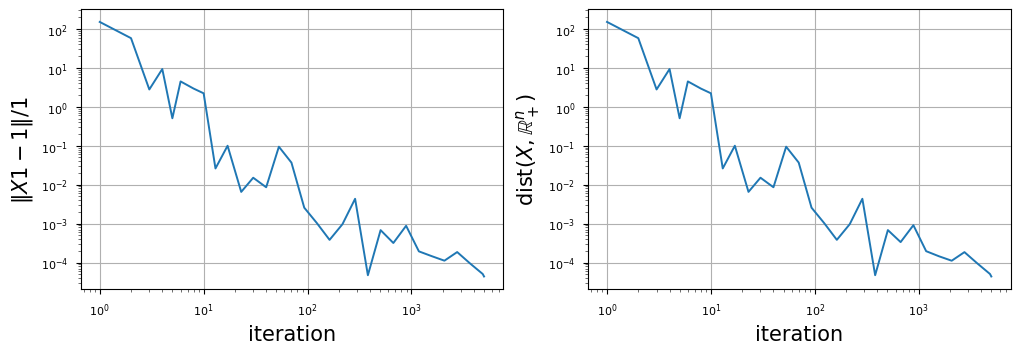

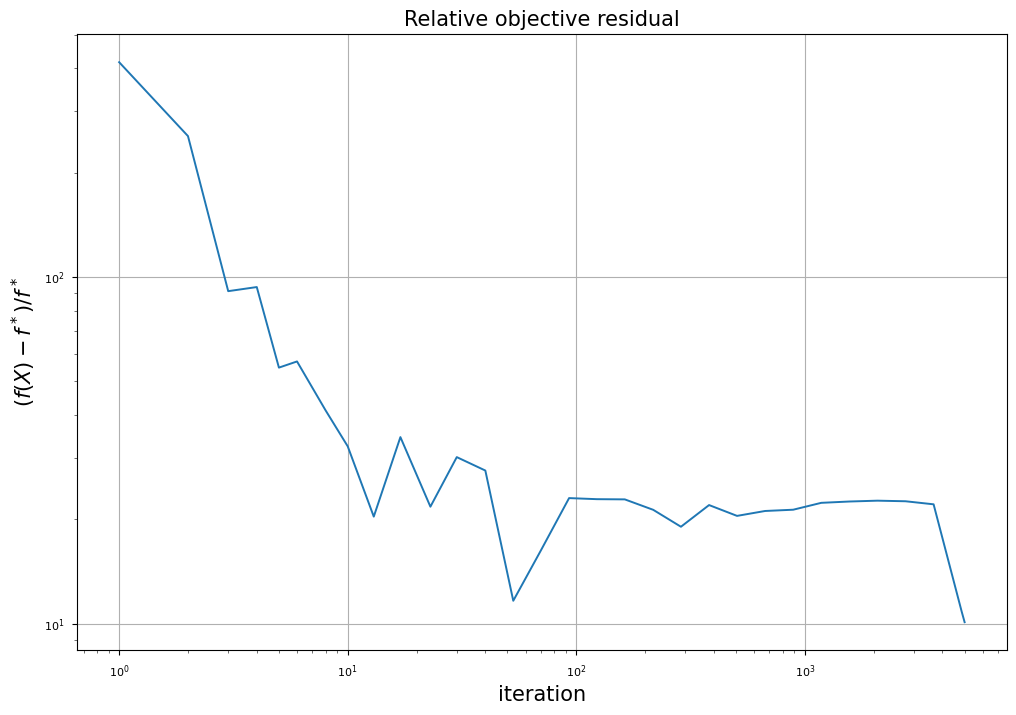

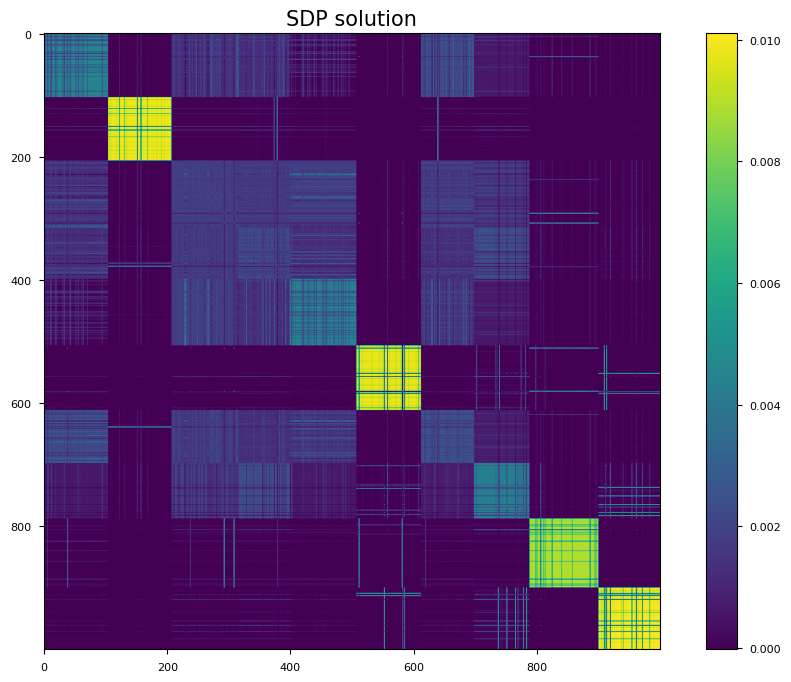

In [10]:
plot_func(iter_HCGM, f1_HCGM,f2_HCGM, obj_HCGM, X_HCGM, opt_val)

### Algorithm 2. PD3O splitting

To implement PD3O we need to specify the proximal operator of $h$ and $g^*$ as well as the linear operator $A$. We do so in the following cell. Note that the `DualVariable` class is created to keep track of all three dual variable $(y_1,y_2,y_3)$ in a concise way.
In the following cells fill in the proximal operators of $h$ and $g$.

**Hint**: Recall that the proximal operator of an indicator function is a projection. We give you the `projSDP`, which projects onto $\mathcal X$. Further, the proximal operator of a seperable sum is a concatenation of the proximal operators of each term (see the lecture on proximal methods).

In [11]:
f = Function(
    f = lambda X : np.sum(C.flatten()*X.flatten()),
    grad = lambda X : C
)

h = Function(
    f = lambda X : 0 if (ispsd(X) and np.trace(X) <= kappa) else float('inf') ,
    prox = lambda tau, X: projSDP(X,kappa)
)

g = Function(
    f = lambda y: 0 if (y.y_1==b) and (y.y_2==b) and (np.all(y.y_3 >=0)) else float('inf'),
    prox = lambda sigma, y: DualVariable(b, b, np.maximum(y.y_3,0.0))
)

def A(x):
    return DualVariable(A1(x), A2(x), x)

def A_T(y):
    return At1(y.y_1)+ At2(y.y_2)+ y.y_3

composite = (f, g, h, A, A_T)

#### Question 2.2.3 (5 pts)

Complete the missing lines in the function
definitions of `PD3O` 

**Remarks:** 

- In our case, we advise you to **multiply the step-size for $y_3$ by $10^4$** to obtain a better practical convergence. It is possible to use different dual step sizes, $\{ \sigma_1 , \sigma_2, \sigma_3 \}$.  Such a diagonal variable stepsize is supported through `[sigma1, sigma2, sigma3]*dual_variable`.
- The algorithm needs the proximal operator of $g^*$, the Fenchel dual of $g$, using the Moreau identity express the prox of $g^*$ in terms of the prox of $g$. You will need to multiply by the stepsize `Sigma` and its inverse `Sigma_inv` which we provide in the code below.

In [12]:
@dataclass
class PD3O_state(OptState):
    x_k: Matrix
    y_k: DualVariable(Vector, Vector, Matrix)
    tau: float
    sigma: float

In [13]:
def PD3O_initialize(composite, x_zero):
    L = 1e2
    tau = 1/L
    return PD3O_state(x_k = x_zero, y_k = A(x_zero), tau=tau, sigma=1/(L**2*tau))

def PD3O_update(composite, state):
    f, g, h, A, A_T = composite
    y_k = state.y_k
    x_k, _, tau, sigma = state
    
    next_x_k = h.prox(tau,x_k - tau*(f.grad(x_k) + A_T(y_k)))

    x_bar = 2*next_x_k - x_k + tau*(f.grad(x_k) - f.grad(next_x_k))
    
    Sigma = [sigma, sigma, sigma*1e4]
    Sigma_inv = [1/sigma, 1/sigma, 1/(sigma*1e4)]
    next_y_k = y_k + Sigma*A(x_bar)- Sigma* g.prox(Sigma_inv,Sigma_inv*y_k + A(x_bar))
    
    return PD3O_state(next_x_k, next_y_k, tau, sigma)


In [14]:
PD3O = OptAlgorithm(name="PD3O", init_state = PD3O_initialize, state_update = PD3O_update)

#### Question 2.2.4 (2 pts) Run PD3O

Run `PD3O` for $1000$-iterations and plot the result.

In [15]:
X_PD3O, f1_PD3O, f2_PD3O, obj_PD3O, iter_PD3O, time_PD3O = run_PD3O(PD3O, composite, maxit=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

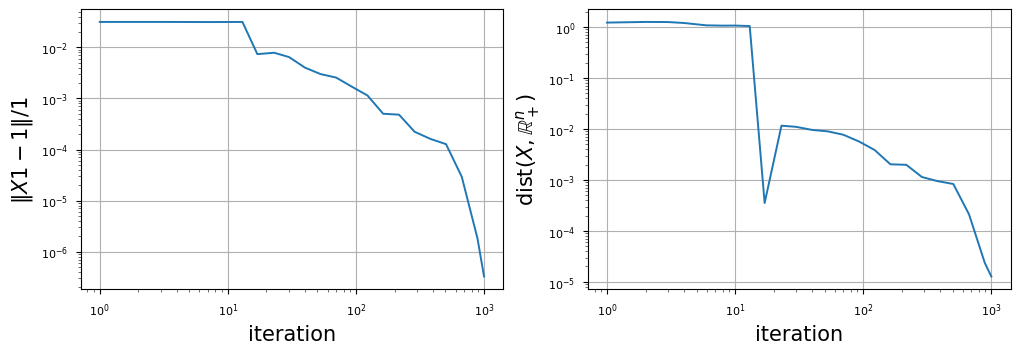

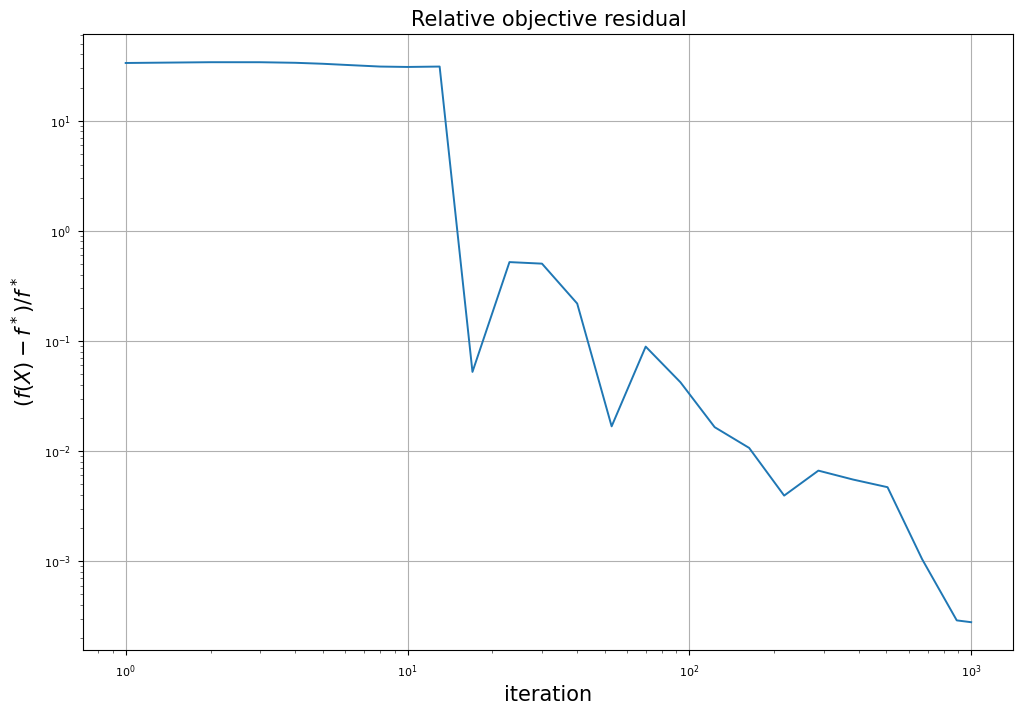

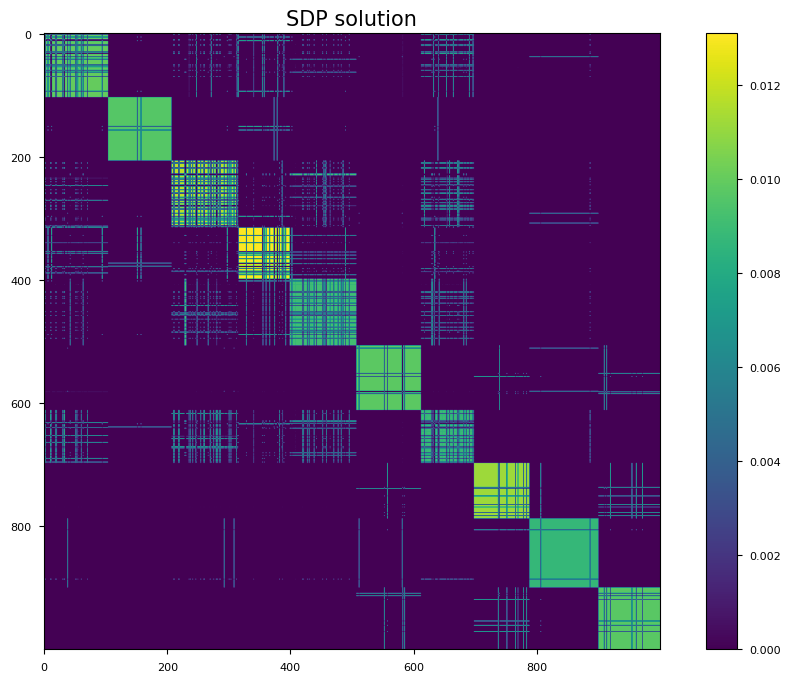

In [16]:
plot_func(iter_PD3O, f1_PD3O,f2_PD3O, obj_PD3O, X_PD3O, opt_val)

### Comparing HCGM and PD3O

#### Question 2.2.5 (3 pt)

Plot the results with the function `plot_comp`. What are the final objective values? Are they below the optimal value provided to you in `opt_val`? If yes, explain the reason. Answer in the box below.

Value reached by HCGM : 633.2219823700894
Value reached by PD3O : 57.0374745932144
Optimal value : 57.053391868140864


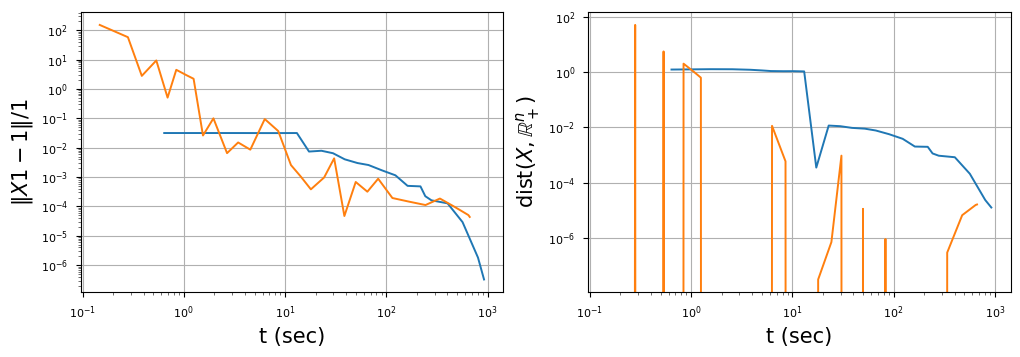

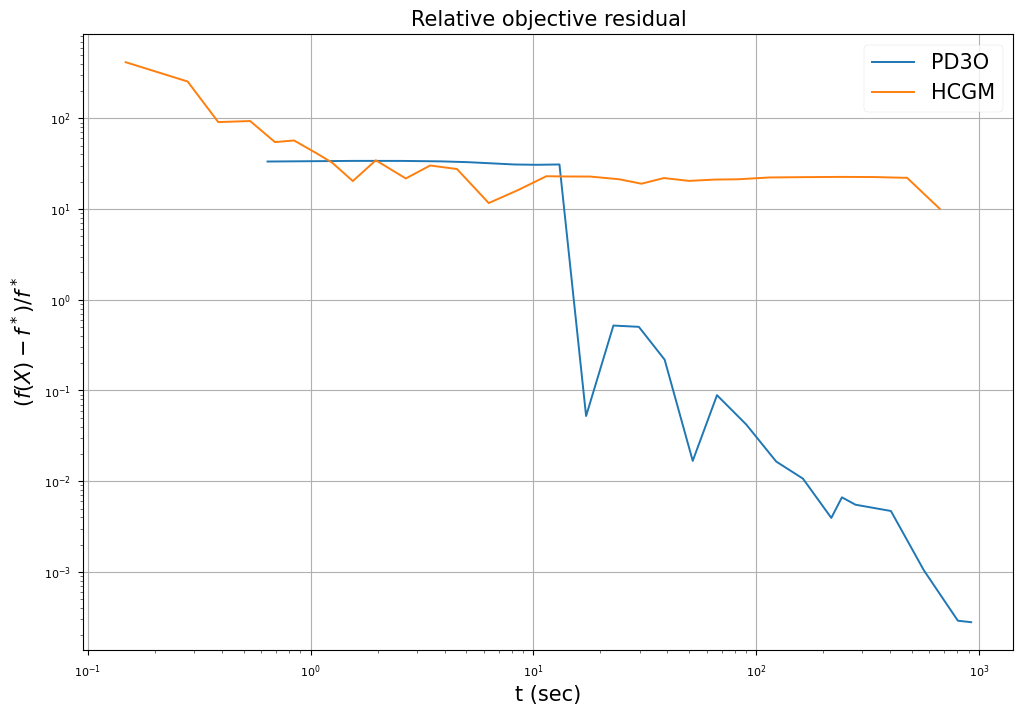

In [17]:
times = (time_PD3O, time_HCGM)
feas1 = (f1_PD3O, f1_HCGM)
feas2 = (f2_PD3O, f3_HCGM)
obj   = (obj_PD3O, obj_HCGM)
print("Value reached by HCGM :",obj_HCGM[len(obj_HCGM)-1])
print("Value reached by PD3O :", obj_PD3O[len(obj_PD3O)-1])
print("Optimal value :",opt_val[0][0])
plot_comp(times, feas1,feas2, obj, opt_val)

<font color=‘blue’>
    
**Write your answer here**

The final objective values are HCGM = 633.222 and PD3O = 57.0375. The optimal value we aimed for was 57.0534, so only PD3O reached the optimal value. We can also explain that only PD3O are below the optimal because the plot shows the difference $f - f^*$ using negative exponents at the end of the curve. Since the plot is in log-log scale, this means that the difference $f - f^*$ is negative, indicating that the optimal value has been reached.

#### Rounding: Get the assignments from the result of the SDP
Getting the assignments requires going back to the $10$ dimensional space discussed before, and using the coordinates multiplied with the obtained matrix to construct a "denoised" version of the data points. This allows then to find the clusters from these $10$ dimensional data. Our implementation is the python reimplementation of their matlab code which can be found on [github](https://github.com/solevillar/kmeans_sdp).

In [18]:
center_HCGM, assign_HCGM = sdp_rounding(X_HCGM,10, digits)
center_PD3O, assign_PD3O = sdp_rounding(X_PD3O,10, digits)

#### k-means value: HCGM & PD3O

Using the function `value_kmeans`, run the cell below to obtain the $k$-means value before and after running both algorithms. 

    

In [19]:
k_means_before = value_kmeans(digits, labels-1) # k_means value with true labels
k_means_after_HCGM  = value_kmeans(digits, assign_HCGM) # k_means value with assigned lables
k_means_after_PD3O  = value_kmeans(digits, assign_PD3O) # k_means value with assigned lables

print('k-means value initial: {:.4f}'.format(k_means_before))
print('k-means value for HCGM: {:.4f}'.format(k_means_after_HCGM))
print('k-means value for PD3O: {:.4f}'.format(k_means_after_PD3O))

k-means value initial: 150.9680
k-means value for HCGM: 42.6871
k-means value for PD3O: 28.7269


#### Question 2.2.6 (3 pts) k-means value: Lloyd's algorithm

Run the function `kmeans` a few times and report the $k$-means value obtained by Llyod's algorithm. Compare it with the ones obtained by rounding the solution of convex methods `HCGM` and `PD3O`.  Comment on the result.

In [24]:
centers_Lloyd, classifications_Lloyd, k_means_Lloyd = kmeans(digits.T, 10)#k_means value with Lloyds k-means algorithm

print('k-means value for Lloyd''s algorithm: {:.4f}'.format(k_means_Lloyd))

k-means value for Lloyds algorithm: 187.5176


<font color=‘blue’>
    
**Write your answer here**

We observe that the k-means values for HCGM and PD3O are significantly lower than those for Lloyd's algorithm. This suggests that the convex methods, HCGM and PD3O, provide better solutions compared to Lloyd's algorithm. A lower k-means value indicates that the clusters generated by the algorithm are closer to the actual data points, which implies more accurate clustering. The performance difference can be attributed to the fact that HCGM and PD3O employ convex optimization techniques, which are more likely to yield globally optimal solutions. Furthermore, the rounding of the convex solutions does not substantially affect their quality. In contrast, Lloyd's algorithm is more susceptible to getting trapped in local minima, leading to suboptimal clustering and a higher k-means value.

## OPTIONAL: Additional results for clustering fMNIST Data

### Misclassification rates: HCGM & PD3O


**Dataset:** We use the fashion-MNIST data in (Xiao et al. 2017) which is released as
a possible replacement for the MNIST handwritten digits . Each data
point is a 28x28 grayscale image, associated with a label from 10
classes. Classes
are labeled from 0 to 9. First, we extract the meaningful features from
this dataset using a simple 2 layers neural network with a sigmoid
activation. Then, we apply neural network to 1000 test samples from the
same dataset, which gives us a vector $\eta \in \mathbb{R}^{10}$ where
each entry represents the probability being in that class. Then, we form
the pairwise distance matrix $\boldsymbol{C}$ by using this probability
vectors (In the code, you do not need to worry about any of the processing
    details mentioned here. You are directly given the matrix
    $\mathbf{C}$.).

In [25]:
print('Misclassification rate for HCGM: {:.4f}'.format(misclassification_rate(assign_HCGM, labels)))
print('Misclassification rate for PD3O: {:.4f}'.format(misclassification_rate(assign_PD3O, labels)))

Misclassification rate for HCGM: 0.1340
Misclassification rate for PD3O: 0.1250


### Visualize samples and predicted labels

In [26]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [27]:
def vis_samples(assignment, images, labels):
    assignment=assignment.astype(int)
    classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    labels = labels-1
    rand_samp = np.random.randint(0,1000,25)
    plt.figure(figsize=(7,7))
    for i,samp in enumerate(rand_samp):
        plt.subplot(5,5,i+1)
        plt.imshow(1-np.reshape(images[samp],[28,28]), cmap=plt.cm.gray)
        plt.title('Pred. {0}\n Orig. {1}'.format(classes[assignment[samp].item()],classes[labels[samp].item()]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

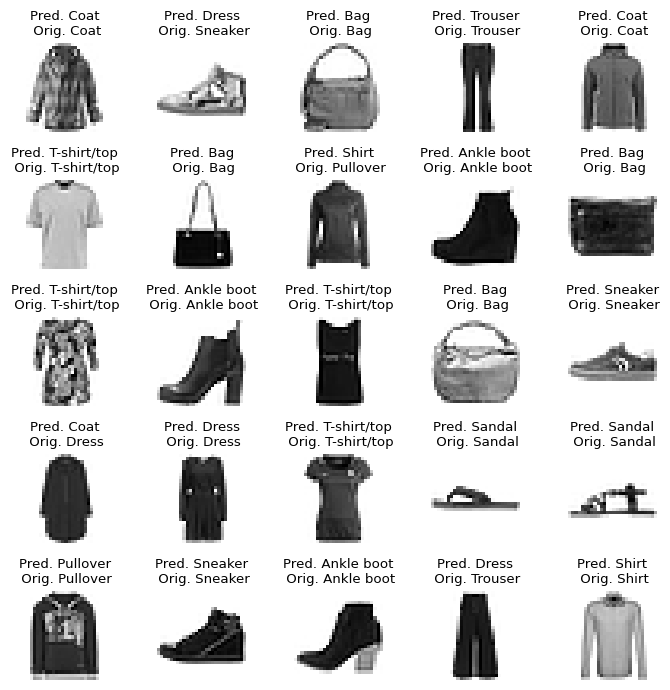

In [28]:
vis_samples(assign_HCGM, images,labels)

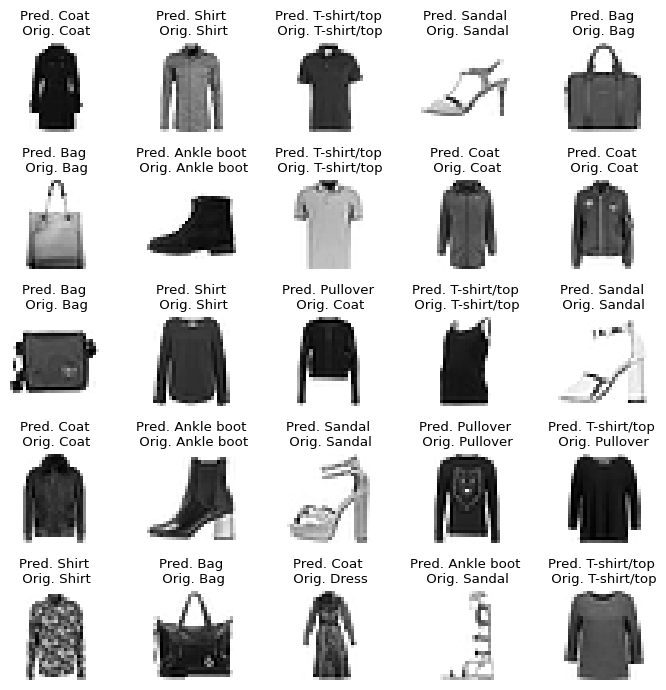

In [29]:
vis_samples(assign_PD3O, images,labels)

## References 

Xiao, Rasul & Vollgraf 2017,  Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms

Peng & Wei 2007, Approximating K-means-type clustering via semidefinite programming

Yurtsever, Fercoq, Locatello & Cevher 2018, A Conditional Gradient Framework for Composite Convex Minimization with Applications to Semidefinite Programming